In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [81]:
# nltk.download()  # 1 fois seulement

In [108]:
df = pd.read_csv("temp.csv", encoding = "ISO-8859-1")
tags = pd.read_csv("top104.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 3 columns):
Title    9348 non-null object
Tags     9348 non-null object
Body     9348 non-null object
dtypes: object(3)
memory usage: 219.2+ KB


## Title

## Tags

In [110]:
taglist = tags["TagName"].tolist()

In [111]:
labels = df["Tags"].str.replace("><", "*").str.replace("[><]*", "").str.split("*").tolist()

In [112]:
counter_class = Counter()
for post in labels:
    for label in post:
        counter_class[label] += 1
        
len(counter_class)

5405

In [113]:
empty = 0
empty_counter = Counter()
added = []
index = []
for i, tl in enumerate(labels):
    for key in tl:
        if key not in taglist:
            empty_counter[key] += 1

for key, freq in empty_counter.items():
    if freq > 25:
        added.append(key)

taglist += added
for i, tl in enumerate(labels):
    labels[i] = [word for word in tl if word in taglist]
    if len(labels[i]) == 0:
        empty += 1
        index.append(i)
        for tag in tl:
            empty_counter[tag] += 1
print(empty)

0


In [114]:
counter_class = Counter()
for post in labels:
    for label in post:
        counter_class[label] += 1
        
len(counter_class)

194

In [98]:
# df2 = df.drop(df.index[index]).reset_index(drop=True)

In [105]:
# df2.to_csv("temp.csv", index=False)

## Body

In [115]:
df["Body"] = df["Title"] + " " + df['Body']

In [116]:
df["Body"] = df["Body"].str.replace("<code>[^<]*</code>", "")

In [117]:
df["Body"] = df["Body"].str.replace("<[^>]*>", "")

In [118]:
df["Body"] = df["Body"].str.replace("\n", "")

In [119]:
df["Body"].iloc[30]

"Python fstring as function I'd like to use Python f-string for its syntactical simplicity, compared to string.Template() or other approach. However, in my application, the string is loaded from file, and the values of the variable can only be provided later.\r\rIf there a way to invoke fstring functionality separate from the string definition? Hopefully code below will better explain what I hope to achieve.\r\r\r"

In [123]:
corpus = df["Body"].tolist()

In [124]:
cv = TfidfVectorizer(min_df=1, stop_words="english")
cv.fit_transform(corpus)

<9348x29395 sparse matrix of type '<class 'numpy.float64'>'
	with 391092 stored elements in Compressed Sparse Row format>

In [134]:
# count = Counter()
# for sentence in corpus:
#     for word in sentence:
#         count[word] += 1 

In [138]:
# tokenizer = nltk.RegexpTokenizer(r'\w+')
# stemmer = nltk.stem.PorterStemmer()
# sw = set()
# sw.update(nltk.corpus.stopwords.words("english"))
# sw.update([word for word, freq in count.most_common(100)])

# #PunkSentenceTokenizer

# for i, sentence in enumerate(corpus):
#     temp = tokenizer.tokenize(sentence)
#     temp = [word for word in temp if word not in stop_words]
#     temp = [stemmer.stem(word) for word in temp]
#     corpus[i] = temp

In [111]:
# print(count.most_common(250))
# print(len(count))

[('I', 45389), ('use', 11910), ('code', 6067), ('work', 5715), ('like', 5307), ('get', 5185), ('the', 5158), ('tri', 5142), ('error', 4035), ('function', 3966), ('file', 3845), ('follow', 3581), ('would', 3493), ('want', 3435), ('way', 3425), ('1', 3309), ('how', 3292), ('one', 3250), ('2', 3048), ('data', 2997), ('valu', 2888), ('run', 2817), ('0', 2786), ('app', 2759), ('need', 2729), ('creat', 2708), ('call', 2689), ('thi', 2650), ('type', 2647), ('exampl', 2623), ('problem', 2539), ('Is', 2435), ('class', 2434), ('time', 2374), ('3', 2270), ('set', 2257), ('method', 2242), ('also', 2184), ('user', 2172), ('object', 2170), ('differ', 2164), ('chang', 2112), ('know', 2073), ('make', 2063), ('question', 2050), ('but', 2028), ('look', 1967), ('see', 1949), ('return', 1927), ('result', 1927), ('list', 1901), ('So', 1900), ('compil', 1868), ('what', 1835), ('test', 1834), ('In', 1819), ('C', 1812), ('java', 1765), ('issu', 1762), ('first', 1762), ('new', 1737), ('project', 1728), ('seem'

In [112]:
# total = 0
# sum_of_word = []
# for word, freq in count.items() : # .most_common(250):
#     total += freq
#     sum_of_word.append(total)

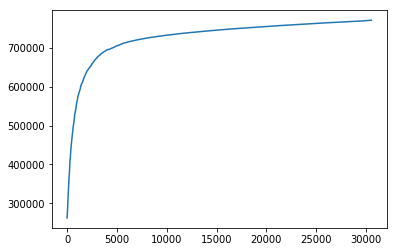

In [142]:
# plt.plot(sum_of_word[250:])
# plt.show()

In [114]:
new_stop_word = [word for word, freq in count.most_common(250)]

In [115]:
new_stop_word

['I',
 'use',
 'code',
 'work',
 'like',
 'get',
 'the',
 'tri',
 'error',
 'function',
 'file',
 'follow',
 'would',
 'want',
 'way',
 '1',
 'how',
 'one',
 '2',
 'data',
 'valu',
 'run',
 '0',
 'app',
 'need',
 'creat',
 'call',
 'thi',
 'type',
 'exampl',
 'problem',
 'Is',
 'class',
 'time',
 '3',
 'set',
 'method',
 'also',
 'user',
 'object',
 'differ',
 'chang',
 'know',
 'make',
 'question',
 'but',
 'look',
 'see',
 'return',
 'result',
 'list',
 'So',
 'compil',
 'what',
 'test',
 'In',
 'C',
 'java',
 'issu',
 'first',
 'new',
 'project',
 'seem',
 'It',
 'applic',
 'version',
 'array',
 'someth',
 '4',
 'two',
 'If',
 'could',
 'find',
 'gener',
 'howev',
 'updat',
 'case',
 'My',
 'android',
 'http',
 'help',
 'implement',
 'line',
 'imag',
 'here',
 'possibl',
 'number',
 'output',
 'element',
 'string',
 'without',
 'when',
 'server',
 'add',
 'build',
 'solut',
 'name',
 'show',
 'contain',
 'variabl',
 'tabl',
 'com',
 'page',
 'ad',
 'check',
 'read',
 'start',
 'whi'

In [116]:
for i, sentence in enumerate(corpus):
    temp = [word for word in sentence if word not in new_stop_word]
    corpus[i] = temp

In [126]:
a = [word for word, freq in count.items()]